In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
startups_data=pd.read_csv("//Users//sreeramkn//Downloads//50_Startups.csv")
startups_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Initial investigation

In [3]:
startups_data.shape

(50, 5)

In [4]:
startups_data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [5]:
startups_data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
startups_data.mean()

R&D Spend           73721.6156
Administration     121344.6396
Marketing Spend    211025.0978
Profit             112012.6392
dtype: float64

In [7]:
startups_data.std()

R&D Spend           45902.256482
Administration      28017.802755
Marketing Spend    122290.310726
Profit              40306.180338
dtype: float64

### Data preparation/Data preprocessing

In [8]:
del startups_data['State']

In [9]:
x=startups_data.iloc[:,0:3]
y=startups_data['Profit']

In [10]:
startups_data=startups_data.rename({'R&D Spend':'R_D_Spend','Marketing Spend':'Marketing_Spend'},axis=1)

In [11]:
startups_data.head()

,R_D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


### Data tranformation-Standardscaler

In [12]:
from sklearn.preprocessing import StandardScaler
stdscaler_model=StandardScaler().fit_transform(x)

In [13]:
scaled_model=pd.DataFrame(stdscaler_model,columns=('R_D_Spend','Administration','Marketing_Spend'))
scaled_model['profit']=y
scaled_model

,R_D_Spend,Administration,Marketing_Spend,profit
0,2.016411,0.560753,2.153943,192261.83
1,1.955860,1.082807,1.923600,191792.06
2,1.754364,-0.728257,1.626528,191050.39
3,1.554784,-0.096365,1.422210,182901.99
4,1.504937,-1.079919,1.281528,166187.94
5,1.279800,-0.776239,1.254210,156991.12
6,1.340066,0.932147,-0.688150,156122.51
7,1.245057,0.871980,0.932186,155752.60
8,1.030369,0.986952,0.830887,152211.77
9,1.091819,-0.456640,0.776107,149759.96


In [14]:
scaled_model.std()

R_D_Spend              1.010153
Administration         1.010153
Marketing_Spend        1.010153
profit             40306.180338
dtype: float64

In [15]:
scaled_model.mean()

R_D_Spend          1.199041e-16
Administration    -2.919887e-16
Marketing_Spend   -9.325873e-17
profit             1.120126e+05
dtype: float64

### Model buliding

In [16]:
x_scaled=scaled_model.iloc[:,:3]
y_scaled=scaled_model['profit']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,test_size=0.2)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 3)
(10, 3)
(40,)
(10,)


### Assumptions check

In [19]:
scaled_model.corr()

,R_D_Spend,Administration,Marketing_Spend,profit
R_D_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


From the correlation table, R&D and Marketing spend is highly correlated with the profit

<AxesSubplot:>

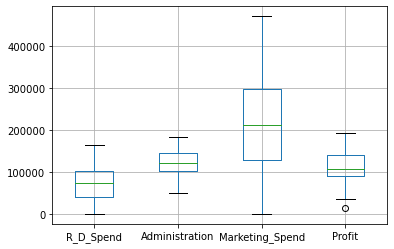

In [20]:
startups_data.boxplot()

In [21]:
import warnings
warnings.filterwarnings('ignore')

(<AxesSubplot:xlabel='Administration', ylabel='Density'>,
 <AxesSubplot:xlabel='Administration', ylabel='Density'>)

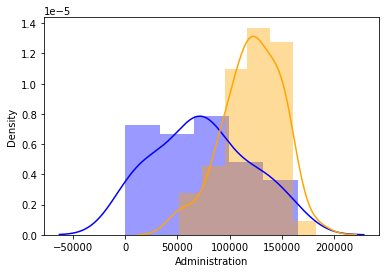

In [22]:
sns.distplot(startups_data['R_D_Spend'],color='blue'),sns.distplot(startups_data['Administration'],color='orange')

(<AxesSubplot:xlabel='Profit', ylabel='Density'>,
 <AxesSubplot:xlabel='Profit', ylabel='Density'>)

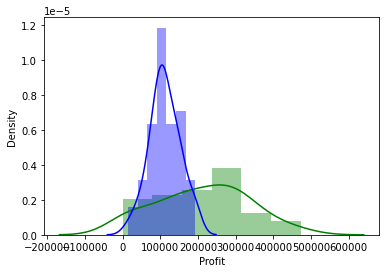

In [23]:
sns.distplot(startups_data['Marketing_Spend'],color='green'),sns.distplot(startups_data['Profit'],color='blue')

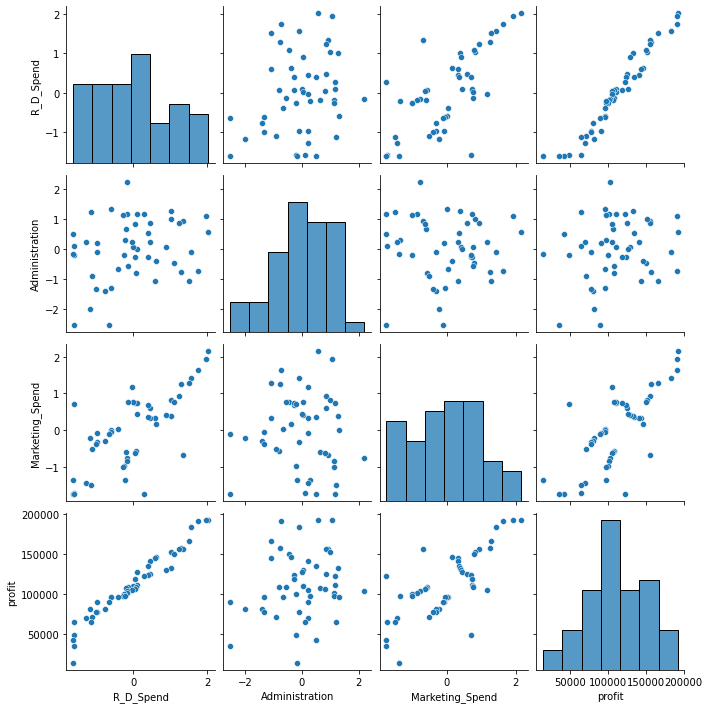

In [24]:
sns.pairplot(scaled_model)

### Model training

In [25]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()

In [26]:
linear_model.fit(x_scaled,y_scaled)

LinearRegression()

### Model testing

In [27]:
y_pred_train=linear_model.predict(x_train)

In [28]:
y_pred_test=linear_model.predict(x_test)

### Model Evaluation

In [29]:
from sklearn.metrics import mean_squared_error,r2_score

In [30]:
print('R2 score for train data: ',r2_score(y_train,y_pred_train))
print('R2 score for test data: ',r2_score(y_test,y_pred_test))

R2 score for train data:  0.9450127814469349
R2 score for test data:  0.9663501613020735


### Model optimization

In [31]:
import statsmodels.formula.api as smf

In [32]:
smf.ols('profit ~ R_D_Spend + Administration + Marketing_Spend',data=scaled_model)

In [33]:
methods=(('profit ~ R_D_Spend + Administration + Marketing_Spend'),('profit ~ R_D_Spend + Administration'),
     ('profit ~ R_D_Spend  + Marketing_Spend'),('profit ~ Administration + Marketing_Spend'),
         ('profit ~ R_D_Spend'),('profit ~ Administration'),('profit ~ Marketing_Spend'))

In [34]:
for model in methods:
    models=smf.ols(model,data=scaled_model).fit()
    print(model)
    params=models.params
    print(params)
    pvalue=models.pvalues
    pvalue_data=pvalue.to_frame()
    pvalue_data.reset_index(inplace=True)
    pvalue_data.rename({'index':'features'},axis=1)
    print('')
    print('pvalue is:')
    print(pvalue_data)
    for i in range(len(pvalue_data)):
        if i!=0:
            if pvalue_data.iloc[i,1]>0.05:
                print('')
                print('{} is an insignificant feature, since pvalue {} is more than 0.05'
                  .format(pvalue_data.iloc[i,0],pvalue_data.iloc[i,1]))
    print('')
    print('aic value is: ',models.aic)
    print('rsqaure value is: ',models.rsquared)
    print('_____________________________________________________________________________________________________')

profit ~ R_D_Spend + Administration + Marketing_Spend
Intercept          112012.639200
R_D_Spend           36612.429551
Administration       -743.773321
Marketing_Spend      3296.263048
dtype: float64

pvalue is:
             index             0
0        Intercept  2.053195e-52
1        R_D_Spend  2.634968e-22
2   Administration  6.017551e-01
3  Marketing_Spend  1.047168e-01

Administration is an insignificant feature, since pvalue 0.6017551078497488 is more than 0.05

Marketing_Spend is an insignificant feature, since pvalue 0.10471681926658087 is more than 0.05

aic value is:  1058.7714985998055
rsqaure value is:  0.9507459940683246
_____________________________________________________________________________________________________
profit ~ R_D_Spend + Administration
Intercept         112012.639200
R_D_Spend          39175.430231
Administration     -1469.892410
dtype: float64

pvalue is:
            index             0
0       Intercept  6.180876e-53
1       R_D_Spend  2.278348e-31


Inference

1)The model with least aic value and higher rsquare value is considered comparatively as a good model

2)In our model, the model which include all the three column gives better result(least aic, more rsquare)

3)In most of the cases, administration become the insignificant feature towards model predictions

4)When model is built separetly by using individual feature, then their individual contribution is high

###  Calculating variance influence factor

In [35]:
reg_rd=smf.ols('R_D_Spend ~ Administration + Marketing_Spend',data=scaled_model).fit().rsquared
vif_rd=1/(1-reg_rd)

reg_ad=smf.ols('Administration ~ R_D_Spend + Marketing_Spend',data=scaled_model).fit().rsquared
vif_ad=1/(1-reg_ad)

reg_ms=smf.ols('Marketing_Spend ~ R_D_Spend + Administration ',data=scaled_model).fit().rsquared
vif_ms=1/(1-reg_ms)

In [36]:
vif_table=pd.DataFrame({'feature':['R_D_Spend','Administration','Marketing_Spend'],'VIF':[vif_rd,vif_ad,vif_ms]})
vif_table

,feature,VIF
0,R_D_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


Here, vif value lies between 1 to 3, hence the features are moderately correlated

## Residual Analysis

### Test for Normality of Residuals (Q-Q Plot)

In [37]:
modelqq=smf.ols('profit ~ R_D_Spend + Administration + Marketing_Spend',data=scaled_model).fit()

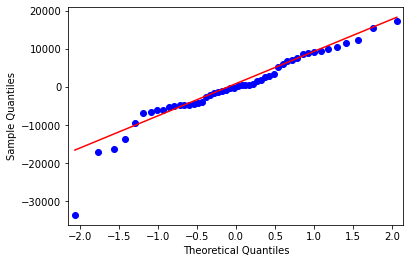

In [38]:
import statsmodels.api as sm
qqplot=sm.qqplot(modelqq.resid,line='q')

The Q-Q plot significes that, the data are moderately normally distributed

In [39]:
list(np.where(modelqq.resid<-15000))

[array([14, 15, 49])]

### Residual Plot for Homoscedasticity

In [40]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

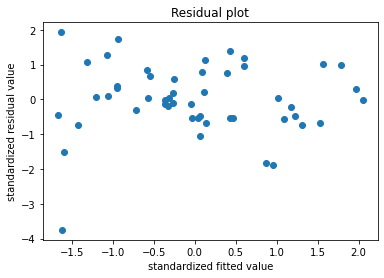

In [41]:
plt.scatter(get_standardized_values(modelqq.fittedvalues),get_standardized_values(modelqq.resid))
plt.title('Residual plot')
plt.xlabel('standardized fitted value')
plt.ylabel('standardized residual value')
plt.show()

### Residual Vs Regressors

R_D_Spend


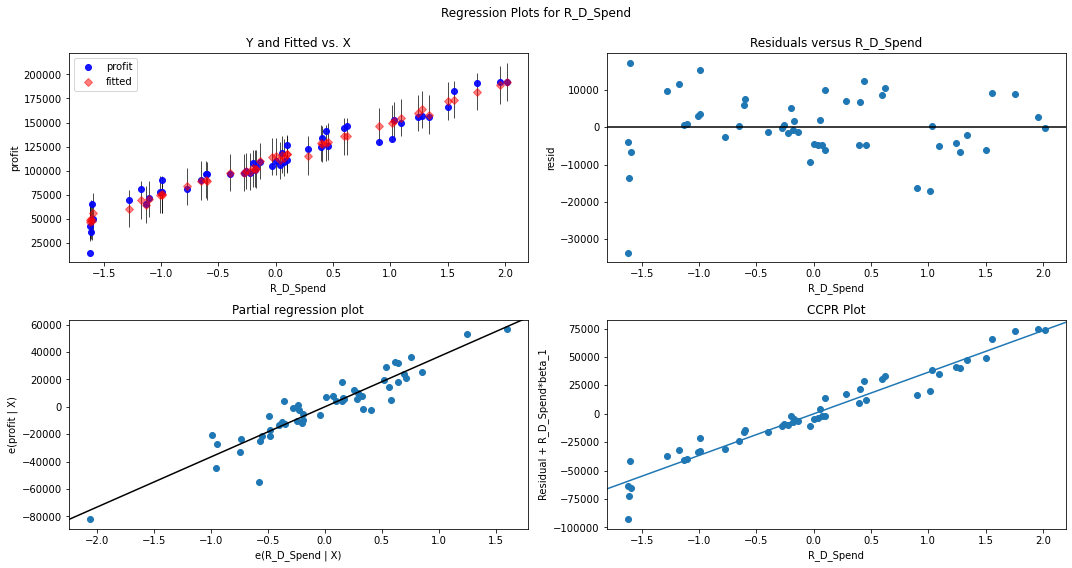

Administration


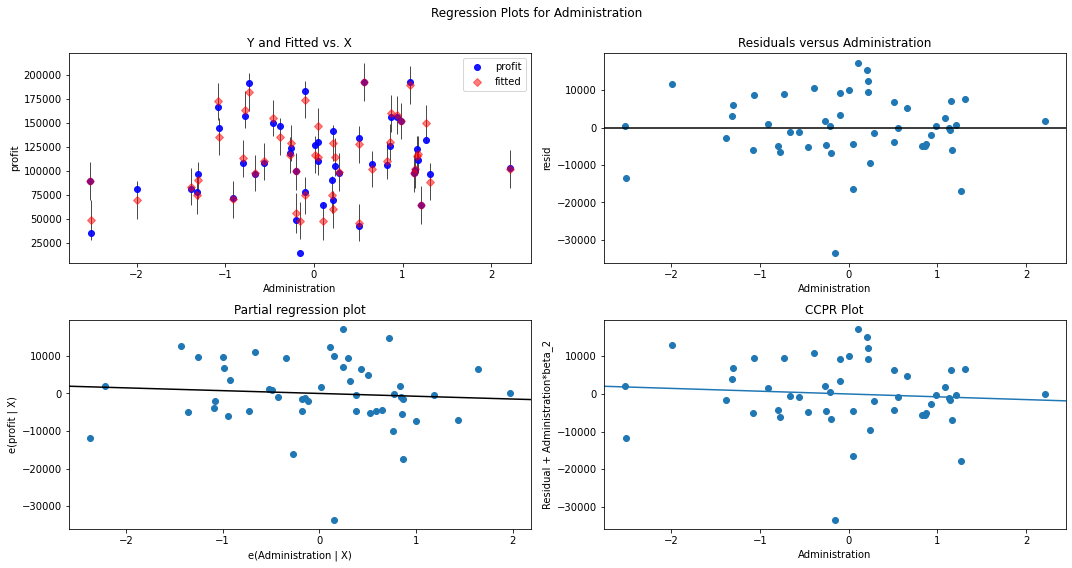

Marketing_Spend


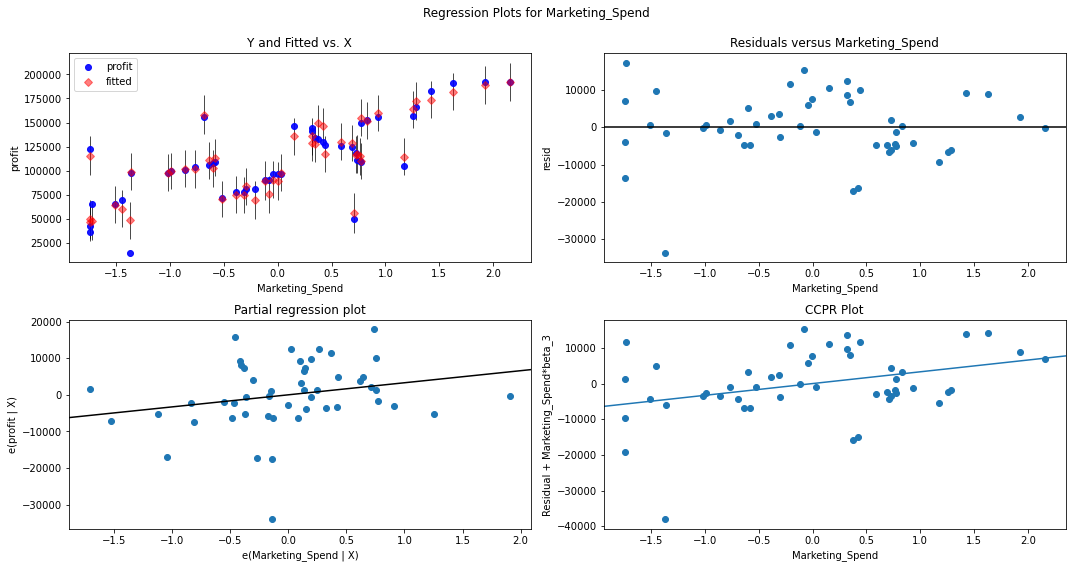

In [42]:
graphics=['R_D_Spend','Administration','Marketing_Spend']
for i in graphics:
    print(i)
    fig=plt.figure(figsize=(15,8))
    fig=sm.graphics.plot_regress_exog(modelqq,i,fig=fig)
    plt.show()

## Model Deletion Diagnostics

### Detecting Influencers/Outliers

### Cook’s Distance

In [43]:
model_influence=modelqq.get_influence()
c,_=model_influence.cooks_distance

<StemContainer object of 3 artists>

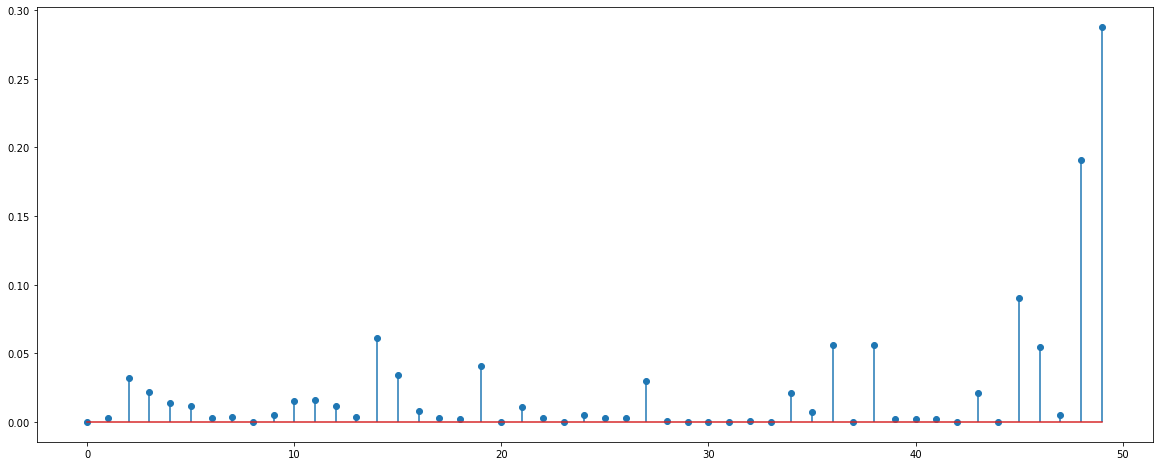

In [44]:
fig_cook=plt.figure(figsize=(20,8))
plt.stem(np.arange(len(startups_data)),np.round(c,3))

In [45]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432673)

The cook's distance clearly shows that the point 49 is an outlier

### High influence point

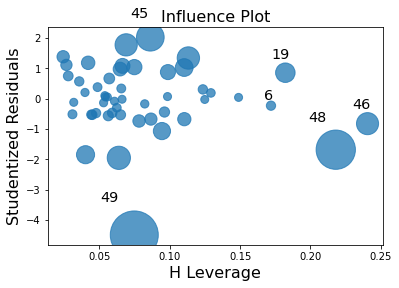

In [46]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(modelqq)
plt.show()

The influence plot shows that the points 49,48,46 and 14 are highly influencial

In [47]:
k=startups_data.shape[1]
n=startups_data.shape[0]
leverage_cutoff=3*((k +1)/n)
leverage_cutoff

0.30000000000000004

### Model optimization

In [48]:
startups_data_new=startups_data
startups_data_new

,R_D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [49]:
startups_data_new=startups_data_new.drop(startups_data_new.index[49])
startups_data_new=startups_data_new.drop(startups_data_new.index[48])
startups_data_new=startups_data_new.drop(startups_data_new.index[46])
startups_data_new=startups_data_new.drop(startups_data_new.index[14]).reset_index()

In [50]:
startups_data_new.shape,scaled_model.shape

((46, 5), (50, 4))

### Final Model

In [51]:
model_final=smf.ols('profit ~ R_D_Spend + Administration + Marketing_Spend',data=scaled_model).fit()

In [52]:
model_final.rsquared,model_final.aic

(0.9507459940683246, 1058.7714985998055)

In [53]:
model_final_ad=smf.ols('profit ~ R_D_Spend + Marketing_Spend',data=scaled_model).fit()

In [54]:
model_final_ad.rsquared,model_final_ad.aic

(0.9504503015559763, 1057.070772191826)

Inference:

The final model is bulit after dropping the outlier

since,feature administration doen't contribute more towards the result, the model built after dropping door performs better than considering all feature (aic value decreases)